<div style="text-align: center">
<h2><font color="#004D7F" size=6>Tratamiento de datos</font></h2>
<h1></h1>

<div style="text-align: center">
<font color="#004D7F" size=5>Curso: Inteligencia Artificial</font><br>
<font color="#004D7F" size=5>Docente: Juan Villegas Cubas</font><br>
    <font color="#004D7F" size=5>Alumno: Gonzalo López Guerrero</font><br>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Octubre 2020</font><br>

In [19]:
import pandas as pd
import numpy as np
%matplotlib inline
import plotly 
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import math

#import twitter data
filename = 'Data/Tweets.csv'
dataset = pd.read_csv(filename)
print(dataset.shape)#rows x columns

(14640, 15)


In [20]:
dataset[
    ['airline_sentiment','airline_sentiment_confidence','negativereason','negativereason_confidence','text']
].head(20)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,text
0,neutral,1.0000,NaN,NaN,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0000,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,NaN,NaN,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.7033,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.0000,@VirginAmerica and it's a really big bad thing...
5,negative,1.0000,Can't Tell,0.6842,@VirginAmerica seriously would pay $30 a fligh...
6,positive,0.6745,NaN,0.0000,"@VirginAmerica yes, nearly every time I fly VX..."
7,neutral,0.6340,NaN,NaN,@VirginAmerica Really missed a prime opportuni...
8,positive,0.6559,NaN,NaN,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,1.0000,NaN,NaN,"@VirginAmerica it was amazing, and arrived an ..."


In [21]:
dataset.shape

(14640, 15)

In [22]:
# cantidad de tweet por clase
dataset['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [23]:
# convertir a entero los valores de las clases
dataset['airline_sentiment'] = dataset['airline_sentiment'].replace('neutral', 1)
dataset['airline_sentiment'] = dataset['airline_sentiment'].replace('negative', 0)
dataset['airline_sentiment'] = dataset['airline_sentiment'].replace('positive', 2)

In [24]:
# Dividar los datos entre text y clase
X = dataset['text'] # data
y = dataset['airline_sentiment'] # labels

<h3>Procesando Datos<7h3>

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer  #reemplazar los caracteres especiales
from tensorflow.keras.preprocessing.text import text_to_word_sequence #analiza la secuencia de los caracteres

In [26]:
# Convertisa los datos en token
# create tokenizer
t = Tokenizer()
t.fit_on_texts(X)

In [27]:
# Encuentra la cantidad de palabras únicas en los tweets
vocab_size = len(t.word_index) + 1

In [28]:
# indexar las palabras (relacionar con su par entero)
sequences = t.texts_to_sequences(X)

In [29]:
# Encuentra el tweet con mayor numero de caracteres para ser tomado como referencias 
#al momento de vectorizar a las palabras
def max_tweet():
    for i in range(1, len(sequences)):
        max_length = len(sequences[0])
        if len(sequences[i]) > max_length:
            max_length = len(sequences[i])
    return max_length

In [30]:
tweet_num = max_tweet()
print("Mayor numero de caracteres en un tweet " , tweet_num)

Mayor numero de caracteres en un tweet  30


In [31]:
# las palabras no encontradas en el tweet se llenan con ceros en el array
# https://realpython.com/python-keras-text-classification/
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = tweet_num
padded_X = pad_sequences(sequences, padding='post', maxlen=maxlen)
valor_maximo =np.amax(padded_X) 
padded_X

array([[  81,   62, 6686, ...,    0,    0,    0],
       [  81,  558,  590, ...,    0,    0,    0],
       [  81,    3,  207, ...,    0,    0,    0],
       ...,
       [  13,   75,  661, ...,    0,    0,    0],
       [  13,    6,   22, ...,    0,    0,    0],
       [  13,   41,   22, ...,    2,  179,    8]])

In [32]:
# Convert labels
labels = to_categorical(np.asarray(y))
labels
# 1 => representa la clase que representa negativo / neutral / positivo

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [33]:
array = dataset.values
padded_Y = array[:,1] #array de clases
padded_Y_test=padded_Y.astype('int')
#padded_Y
padded_X_test = (padded_X /valor_maximo) -1


<a id="section31"></a>
## <font color="#004D7F"> 3.1. Validación Cruzada de k-fold</font>

In [34]:
#Validacion cruzada kfold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10)
model = LogisticRegression(solver='lbfgs', max_iter=1000)
scoring = 'accuracy'
results = cross_val_score(model, padded_X_test, padded_Y_test, cv=kfold, scoring=scoring)
#results
print(f"Accuray: {results.mean()*100.0:,.2f}% ({results.std()*100.0:,.2f}%)") 
#accuracy y desviasion estandar rango
#78% y 94.12% la desviacion estandar da mucho rango

Accuray: 62.42% (11.60%)


<a id="section32"></a>
## <font color="#004D7F"> 3.2. Validación cruzada repetida</font>

In [36]:
#Validacion cruzada con repeticiones
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

repeatedcv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=7)
model = LogisticRegression(solver='lbfgs', max_iter=1000)
results = cross_val_score(model,padded_X_test, padded_Y_test, cv=repeatedcv)
print(f"Accuray: {results.mean()*100.0:,.2f}% ({results.std()*100.0:,.2f}%)")

Accuray: 62.67% (1.26%)


<a id="section33"></a>
## <font color="#004D7F"> 3.3. Validación cruzada dejando uno fuera</font>

In [35]:
#Validacion cruzada dejando uno fuera
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

loocv = LeaveOneOut()
model = LogisticRegression(solver='lbfgs', max_iter=1000)
results = cross_val_score(model, padded_X_test, padded_Y_test, cv=repeatedcv)
print(f"Accuray: {results.mean()*100.0:,.2f}% ({results.std()*100.0:,.2f}%)")

Accuray: 62.67% (1.26%)


## Entrenamiento de datos

In [57]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_X, labels, test_size = 0.2, random_state = 0)

In [39]:
# Size of train and test datasets
print('X_train size:', X_train.shape)
print('y_train size:', y_train.shape)
print('X_test size:', X_test.shape)
print('y_test size:', y_test.shape)

X_train size: (11712, 30)
y_train size: (11712, 3)
X_test size: (2928, 30)
y_test size: (2928, 3)


## Pre-trained word embedding

In [58]:
# GloVe se define como un “algoritmo de aprendizaje no supervisado 
#para obtener representaciones vectoriales de palabras”. 
#Descargamos datos del sitio web vinculado y usamos específicamente las incrustaciones
#100-dimensionales de 400k palabras de Wikipedia en inglés en 2014. 
#Esto se representa en un archivo txt que debemos analizar para crear un
#índice que mapee las palabras a su representación vectorial.

# 100 dimensional version (embedding dimension)

#ayuda a en la decodificacion
#https://stackoverflow.com/questions/9233027/unicodedecodeerror-charmap-codec-cant-decode-byte-x-in-position-y-character
embeddings_index = dict()
f = open('Data/glove/glove.6B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Vectores de palabras cargados: %s' % len(embeddings_index))

Vectores de palabras cargados: 400000


In [63]:
# Se Obtiene todas las palabras únicas en nuestro conjunto de entrenamiento: índice de tokenizadores
# Se encuentra el vector de peso correspondiente en la incrustación de GloVe

# Se define el tamaño de la matriz de incrustación: número de palabras únicas x incrustación dim (100)
embedding_matrix = np.zeros((vocab_size, 100))

# llenado de la matrix
for word, i in t.word_index.items():  # dictionary
    embedding_vector = embeddings_index.get(word) # obtiene un vector incrustado de palabra de GloVe
    if embedding_vector is not None:
        # se agrega a la matrix
        embedding_matrix[i] = embedding_vector # cada fila de la matrix

print(embedding_matrix)

[[ 0.    0.    0.   ...  0.    0.    0.  ]
 [-0.19  0.05  0.19 ... -0.4   0.48 -0.16]
 [-0.04 -0.24  0.73 ... -0.15  0.83  0.27]
 ...
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]]


In [64]:
# Crea una capa de incrustación usando una matriz de incrustación
from tensorflow.keras.layers import Embedding

# la entrada es vocab_size, la salida es 100
# pesos de la matriz de incrustación, establezca entrenable = Falso || para q no se modifiquen los valores de Glove
embedding_layer = Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix],
                           input_length = tweet_num, trainable=False)

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import BatchNormalization

In [66]:
#First Model: Simple LSTM with Dropout and High Dimensionality

In [47]:
lstm_mod1 = Sequential()
lstm_mod1.add(embedding_layer)
lstm_mod1.add(LSTM(256, 
               dropout = 0.2, 
               recurrent_dropout = 0.5))
lstm_mod1.add(Dense(3, activation='softmax'))
lstm_mod1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
lstm_mod1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1576900   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               365568    
_________________________________________________________________
dense (Dense)                (None, 3)                 771       
Total params: 1,943,239
Trainable params: 366,339
Non-trainable params: 1,576,900
_________________________________________________________________


In [48]:
hist_1 = lstm_mod1.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs=100, batch_size=256)

Epoch 1/100
37/37 [==============================] - 36s 984ms/step - loss: 0.8426 - acc: 0.6305 - val_loss: 0.7511 - val_acc: 0.6876
Epoch 2/100
37/37 [==============================] - 33s 882ms/step - loss: 0.7057 - acc: 0.7130 - val_loss: 0.6573 - val_acc: 0.7422
Epoch 3/100
37/37 [==============================] - 33s 905ms/step - loss: 0.6302 - acc: 0.7415 - val_loss: 0.5945 - val_acc: 0.7589
Epoch 4/100
37/37 [==============================] - 33s 899ms/step - loss: 0.6112 - acc: 0.7489 - val_loss: 0.6344 - val_acc: 0.7452
Epoch 5/100
37/37 [==============================] - 33s 901ms/step - loss: 0.5917 - acc: 0.7573 - val_loss: 0.5766 - val_acc: 0.7670
Epoch 6/100
37/37 [==============================] - 35s 953ms/step - loss: 0.5717 - acc: 0.7682 - val_loss: 0.5703 - val_acc: 0.7764
Epoch 7/100
37/37 [==============================] - 21s 555ms/step - loss: 0.5672 - acc: 0.7721 - val_loss: 0.5475 - val_acc: 0.7819
Epoch 8/100
37/37 [==============================] - 21s 577ms

Epoch 62/100
37/37 [==============================] - 23s 634ms/step - loss: 0.1445 - acc: 0.9459 - val_loss: 0.8255 - val_acc: 0.7913
Epoch 63/100
37/37 [==============================] - 23s 623ms/step - loss: 0.1457 - acc: 0.9468 - val_loss: 0.7862 - val_acc: 0.7892
Epoch 64/100
37/37 [==============================] - 25s 676ms/step - loss: 0.1290 - acc: 0.9535 - val_loss: 0.8639 - val_acc: 0.7926
Epoch 65/100
37/37 [==============================] - 23s 611ms/step - loss: 0.1347 - acc: 0.9499 - val_loss: 0.8429 - val_acc: 0.7939
Epoch 66/100
37/37 [==============================] - 23s 632ms/step - loss: 0.1263 - acc: 0.9541 - val_loss: 0.9493 - val_acc: 0.7964
Epoch 67/100
37/37 [==============================] - 23s 619ms/step - loss: 0.1265 - acc: 0.9547 - val_loss: 0.8817 - val_acc: 0.7913
Epoch 68/100
37/37 [==============================] - 24s 642ms/step - loss: 0.1228 - acc: 0.9560 - val_loss: 0.8713 - val_acc: 0.7913
Epoch 69/100
37/37 [==============================] - 2

In [77]:
# Entrenamiento y test accuracy
loss, accuracy = lstm_mod1.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = lstm_mod1.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9506
Testing Accuracy:  0.7828



## <font color="#004D7F"> Matriz de confusión</font>

In [72]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [73]:
# Obtiene los valores predichos
y_pred = lstm_mod1.predict(X_test)  # tiene como salida las probabilidades de cada sentimiendo
# Cree una matriz numérica vacía para que coincida con la longitud de las observaciones de entrenamiento
y_pred_array = np.zeros(X_test.shape[0])

# Encuentra la clase con mayor probabilidad
for i in range(0, y_pred.shape[0]):
    label_predict = np.argmax(y_pred[i]) # columna con mayor probabilidad 
    y_pred_array[i] = label_predict

# Convertir a enteros
y_pred_array = y_pred_array.astype(int)

In [78]:
#  Convertir y_test a una dimension  numpy array
y_test_array = np.zeros(X_test.shape[0])

#  Encuentra clase con 1
for i in range(0, y_test.shape[0]):
    label_predict = np.argmax(y_test[i])
    y_test_array[i] = label_predict

y_test_array = y_test_array.astype(int)

In [79]:
class_names = np.array(['Negative', 'Neutral', 'Positive'])

Confusion matrix, without normalization
[[1596  189   85]
 [ 191  362   61]
 [  64   46  334]]
Normalized confusion matrix
[[0.85 0.1  0.05]
 [0.31 0.59 0.1 ]
 [0.14 0.1  0.75]]


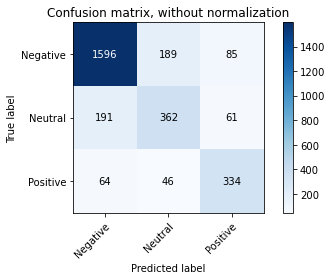

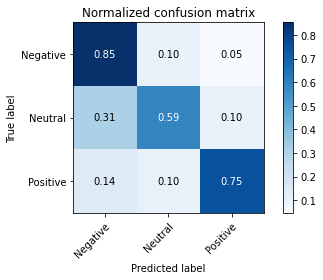

In [80]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y traza la matriz de confusión.
    La normalización se puede aplicar configurando `normalize = True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_array, y_pred_array, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test_array, y_pred_array, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Vemos en las matrices de confusión anteriores, el Modelo hizo un excelente trabajo al predecir una etiqueta negativa cuando el tweet era negativo, pero sufrió más al predecir etiquetas positivas y neutrales. Esto puede deberse al hecho de que nuestro entrenamiento estaba compuesto en gran parte por tweets negativos, por lo que el modelo aprendió a dar una mayor probabilidad a una etiqueta negativa de este desequilibrio de clases.